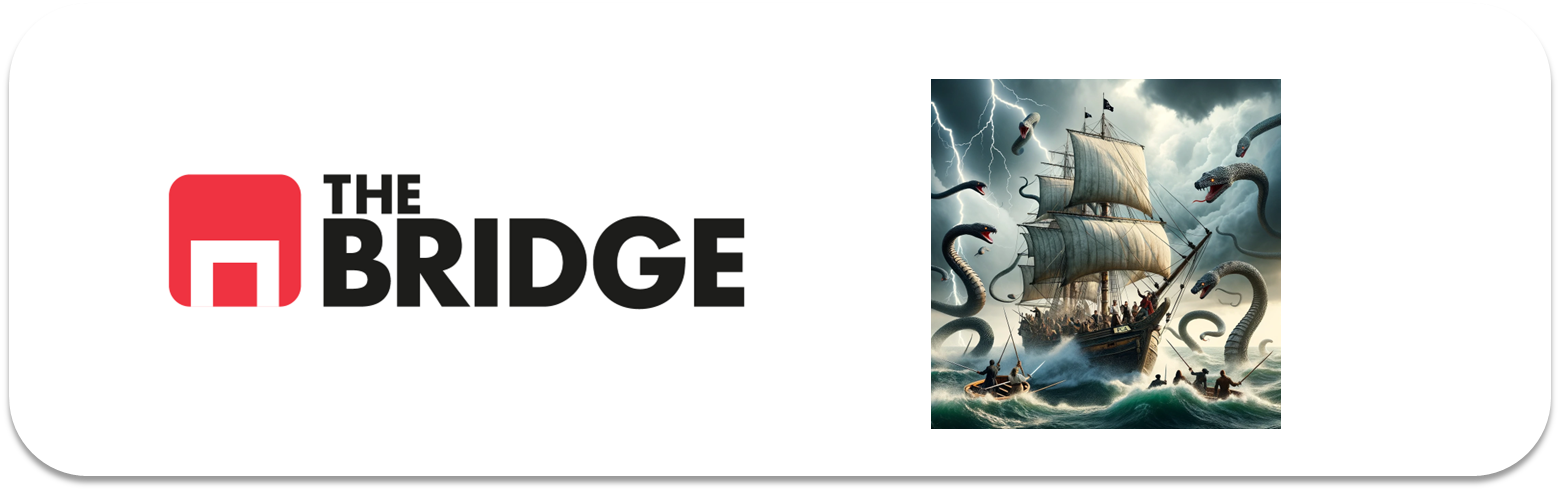

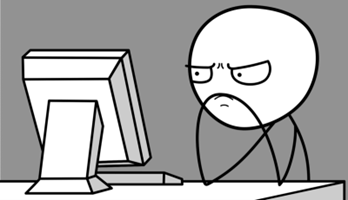

Para ejercitarte y afianzar lo aprendido sobre **PCA**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)

La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

# Principal Components Analysis: Nutrition
En esta colección de ejercicios no vas a montar ningún modelo de Machine Learning supervisado, sino que vas a practicar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlas, pintar y escoger número de componentes según varianza.


### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [59]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Ejercicio 1: Importa los datos
1. Importa los datos: *nutrition.csv*
2. Observa las columnas que hay, así como su tipo.

In [60]:

df = pd.read_csv('data/nutrition.csv')

In [61]:
df.head(2)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.02,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.02,0.000018,0.004762,0.032857,0.018182,0.004545


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [63]:
# Obtén los tipos de datos de cada columna
tipos_de_datos = df.dtypes
# Inicializa listas para almacenar nombres de columnas numéricas y categóricas
columnas_numericas = []
columnas_categoricas = []
# Itera sobre cada columna y clasifícala como numérica o categórica
for columna, tipo in tipos_de_datos.items():
    if pd.api.types.is_numeric_dtype(tipo):
        columnas_numericas.append(columna)
    else:
        columnas_categoricas.append(columna)
# Muestra las columnas numéricas y categóricas
print("Columnas numéricas:")
print(columnas_numericas)
print("\nColumnas categóricas:")
print(columnas_categoricas)

Columnas numéricas:
['ID', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg', 'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA', 'Zinc_USRDA']

Columnas categóricas:
['FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName', 'ScientificName']


In [64]:
df.describe()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,15467.757368,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,9221.428766,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,1001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8695.250000,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,14273.000000,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,20050.750000,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,93600.000000,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


In [65]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
print(df[columnas_numericas].mean(axis=0))

----------------------
Media de cada variable
----------------------
ID                  15467.757368
Energy_kcal           226.438617
Protein_g              11.523910
Fat_g                  10.647024
Carb_g                 21.819062
Sugar_g                 6.560253
Fiber_g                 2.023242
VitA_mcg               93.968786
VitB6_mg                0.264369
VitB12_mcg              1.225260
VitC_mg                 7.925377
VitE_mg                 0.872329
Folate_mcg             50.306104
Niacin_mg               3.411560
Riboflavin_mg           0.237248
Thiamin_mg              0.209857
Calcium_mg             73.411348
Copper_mcg              0.172181
Iron_mg                 2.696771
Magnesium_mg           32.745301
Manganese_mg            0.504439
Phosphorus_mg         155.986308
Selenium_mcg           12.614945
Zinc_mg                 1.970216
VitA_USRDA              0.104410
VitB6_USRDA             0.155511
VitB12_USRDA            0.510525
VitC_USRDA              0.088060
VitE_US

In [66]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
print(df[columnas_numericas].var(axis=0))

-------------------------
Varianza de cada variable
-------------------------
ID                  8.503475e+07
Energy_kcal         2.869260e+04
Protein_g           1.113149e+02
Fat_g               2.517411e+02
Carb_g              7.419631e+02
Sugar_g             1.850171e+02
Fiber_g             1.860775e+01
VitA_mcg            6.074054e+05
VitB6_mg            2.290714e-01
VitB12_mcg          1.865534e+01
VitC_mg             3.315774e+03
VitE_mg             1.481502e+01
Folate_mcg          3.480488e+04
Niacin_mg           2.337308e+01
Riboflavin_mg       2.023920e-01
Thiamin_mg          2.687065e-01
Calcium_mg          4.054732e+04
Copper_mcg          3.058670e-01
Iron_mg             3.279815e+01
Magnesium_mg        3.143672e+03
Manganese_mg        4.074828e+01
Phosphorus_mg       4.124686e+04
Selenium_mcg        8.004569e+02
Zinc_mg             1.127759e+01
VitA_USRDA          7.498833e-01
VitB6_USRDA         7.926347e-02
VitB12_USRDA        3.238774e+00
VitC_USRDA          4.093548e-0

In [67]:
df.drop(columns='ID', inplace= True)

### Ejercicio 2


Analiza la correlación entre las variables numéricas. 

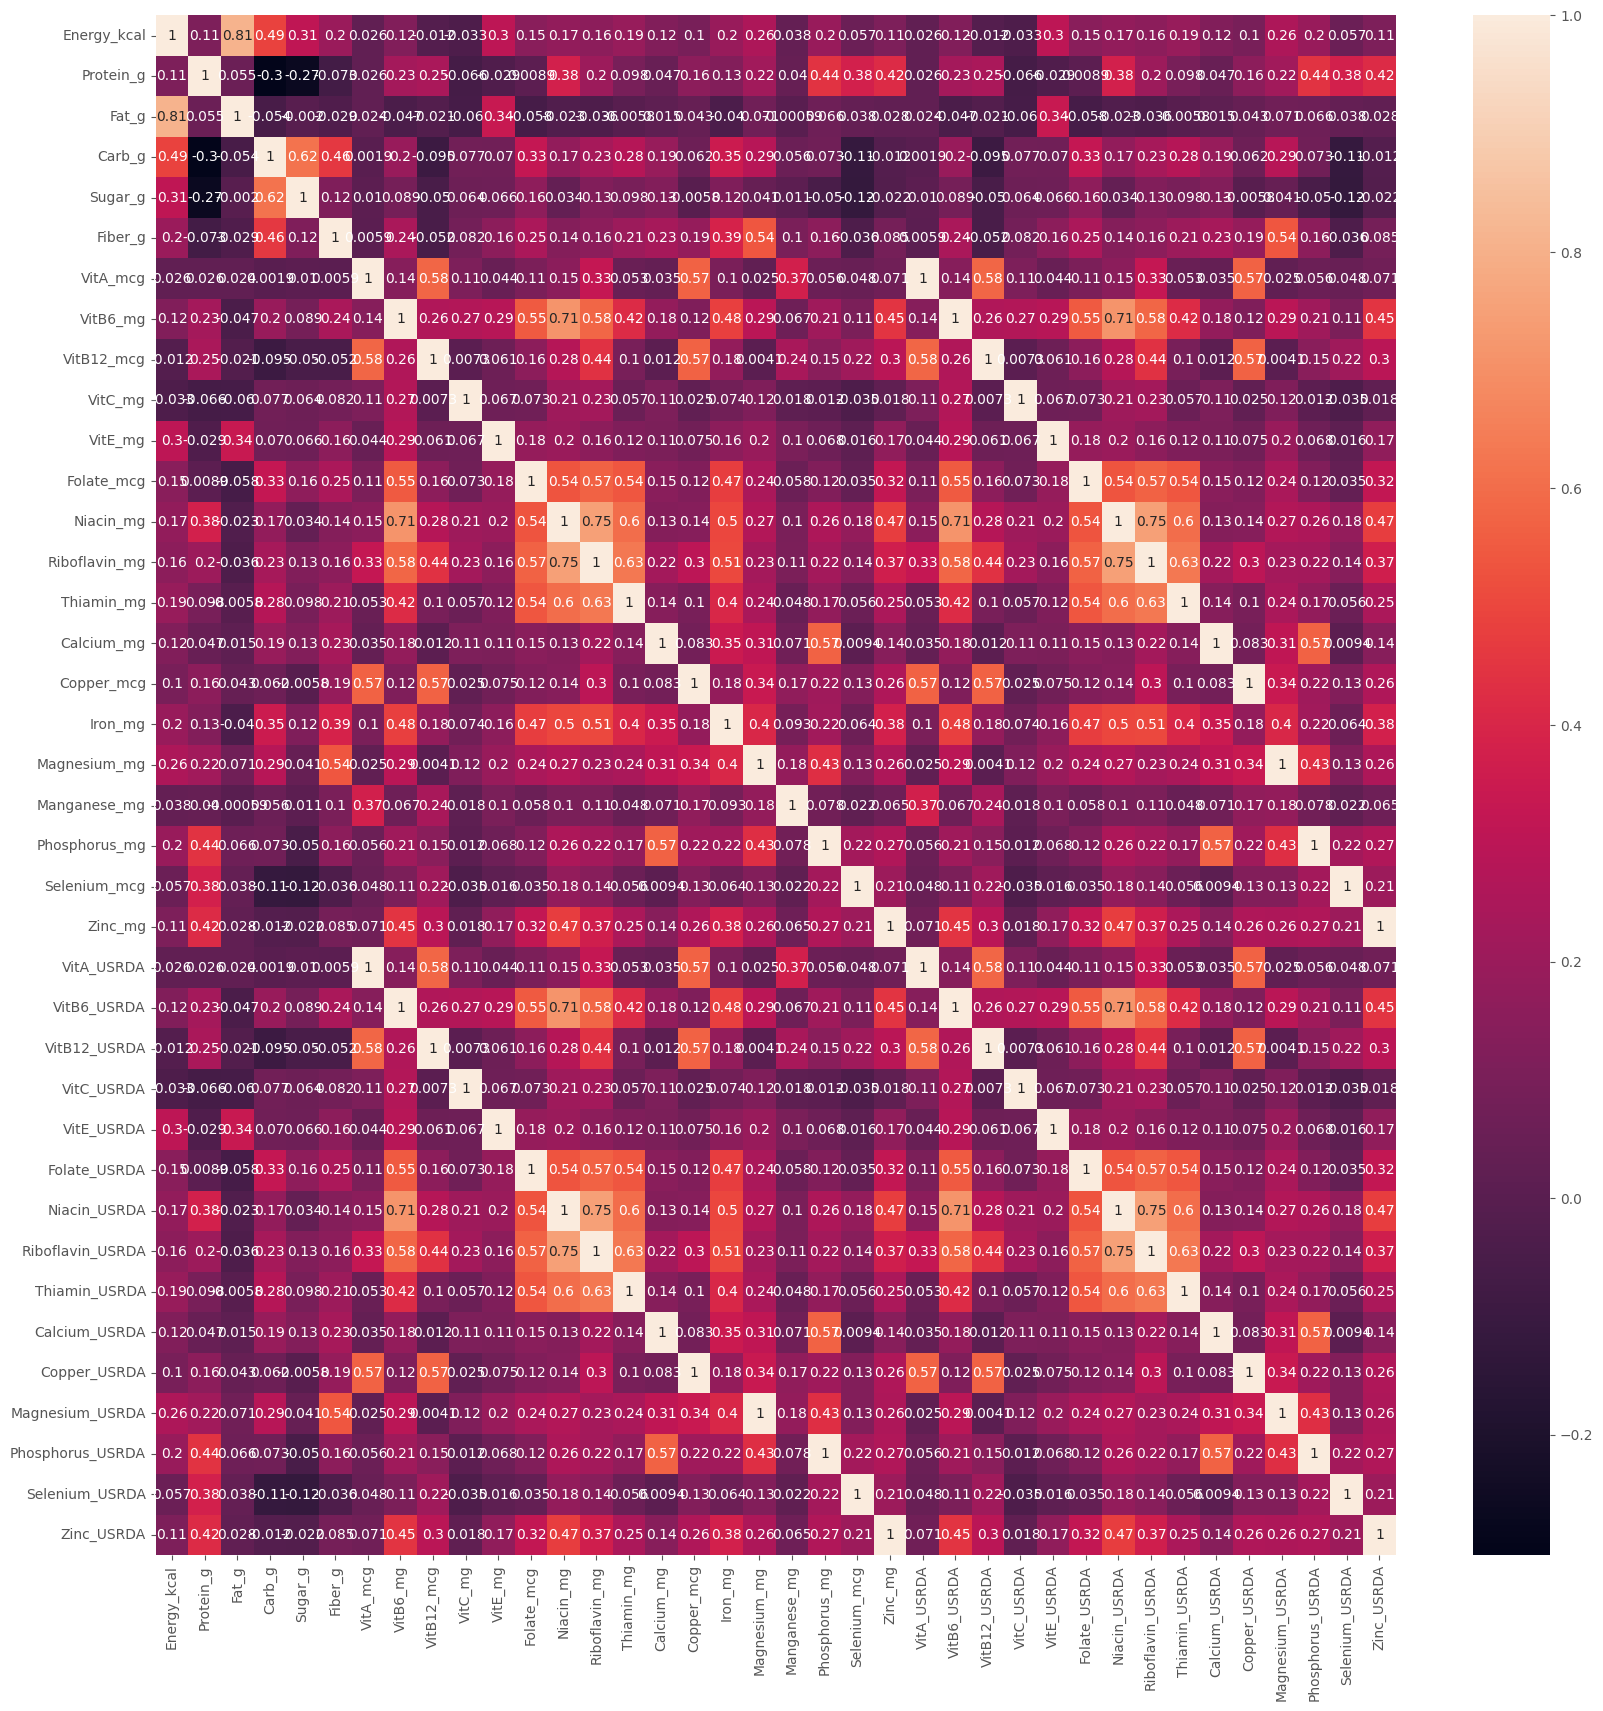

In [68]:
plt.figure(figsize= (20, 20))
sns.heatmap(df.corr(numeric_only= True), annot= True);

### Ejercicio 3

¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [69]:
USDRA = [
    'VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA',
    'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 
    'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 
    'Selenium_USRDA', 'Zinc_USRDA'
]

# Selecciona las columnas especificadas en USDRA y aplica describe()
print(df[USDRA].describe())


        VitA_USRDA  VitB6_USRDA  VitB12_USRDA   VitC_USRDA   VitE_USRDA  \
count  8618.000000  8618.000000   8618.000000  8618.000000  8618.000000   
mean      0.104410     0.155511      0.510525     0.088060     0.058155   
std       0.865958     0.281538      1.799659     0.639808     0.256602   
min       0.000000     0.000000      0.000000     0.000000     0.000000   
25%       0.000000     0.020147      0.000000     0.000000     0.000000   
50%       0.001667     0.070588      0.033333     0.000000     0.007333   
75%       0.023333     0.208824      0.540625     0.027778     0.030000   
max      33.333333     7.058824     41.204167    26.666667     9.960000   

       Folate_USRDA  Niacin_USRDA  Riboflavin_USRDA  Thiamin_USRDA  \
count   8618.000000   8618.000000       8618.000000    8618.000000   
mean       0.125765      0.213222          0.182499       0.174881   
std        0.466402      0.302161          0.346062       0.431974   
min        0.000000      0.000000          0

Valores diferentes con valor mínimo desde 0 con medias y std diferentes.

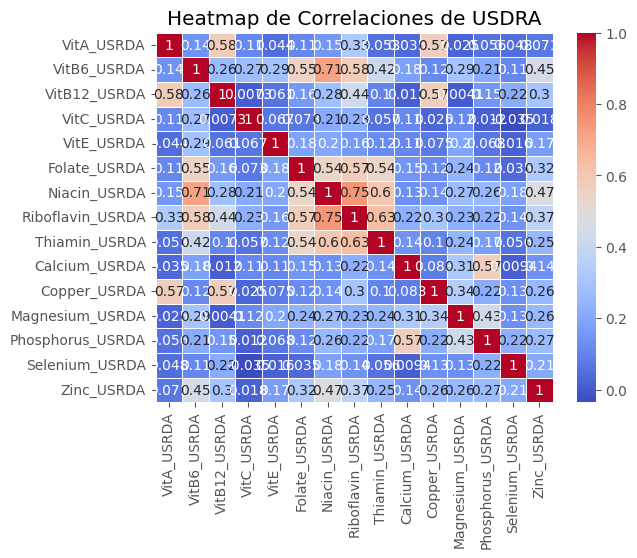

In [70]:
# Calcular la matriz de correlación para las columnas en USDRA
corr_matrix = df[USDRA].corr(numeric_only=True)

# Crear un heatmap de la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlaciones de USDRA')
plt.show()

In [71]:
high_corr_df = df.corr(numeric_only= True)[df.corr(numeric_only= True) > 0.9]
print(high_corr_df)

                  Energy_kcal  Protein_g  Fat_g  Carb_g  Sugar_g  Fiber_g  \
Energy_kcal               1.0        NaN    NaN     NaN      NaN      NaN   
Protein_g                 NaN        1.0    NaN     NaN      NaN      NaN   
Fat_g                     NaN        NaN    1.0     NaN      NaN      NaN   
Carb_g                    NaN        NaN    NaN     1.0      NaN      NaN   
Sugar_g                   NaN        NaN    NaN     NaN      1.0      NaN   
Fiber_g                   NaN        NaN    NaN     NaN      NaN      1.0   
VitA_mcg                  NaN        NaN    NaN     NaN      NaN      NaN   
VitB6_mg                  NaN        NaN    NaN     NaN      NaN      NaN   
VitB12_mcg                NaN        NaN    NaN     NaN      NaN      NaN   
VitC_mg                   NaN        NaN    NaN     NaN      NaN      NaN   
VitE_mg                   NaN        NaN    NaN     NaN      NaN      NaN   
Folate_mcg                NaN        NaN    NaN     NaN      NaN      NaN   

In [72]:
high_corr_df = high_corr_df.dropna(thresh=2, axis=0)
print(high_corr_df)

                  Energy_kcal  Protein_g  Fat_g  Carb_g  Sugar_g  Fiber_g  \
VitA_mcg                  NaN        NaN    NaN     NaN      NaN      NaN   
VitB6_mg                  NaN        NaN    NaN     NaN      NaN      NaN   
VitB12_mcg                NaN        NaN    NaN     NaN      NaN      NaN   
VitC_mg                   NaN        NaN    NaN     NaN      NaN      NaN   
VitE_mg                   NaN        NaN    NaN     NaN      NaN      NaN   
Folate_mcg                NaN        NaN    NaN     NaN      NaN      NaN   
Niacin_mg                 NaN        NaN    NaN     NaN      NaN      NaN   
Riboflavin_mg             NaN        NaN    NaN     NaN      NaN      NaN   
Thiamin_mg                NaN        NaN    NaN     NaN      NaN      NaN   
Calcium_mg                NaN        NaN    NaN     NaN      NaN      NaN   
Copper_mcg                NaN        NaN    NaN     NaN      NaN      NaN   
Magnesium_mg              NaN        NaN    NaN     NaN      NaN      NaN   

In [73]:
high_corr_features = pd.DataFrame(high_corr_df.index, columns= ['Correlacion 1']).sort_values(by= 'Correlacion 1').reset_index(drop= True)
high_corr_features.head(10)

,Correlacion 1
0,Calcium_USRDA
1,Calcium_mg
2,Copper_USRDA
3,Copper_mcg
4,Folate_USRDA
5,Folate_mcg
6,Magnesium_USRDA
7,Magnesium_mg
8,Niacin_USRDA
9,Niacin_mg


In [74]:
#Estadísticas de las features que contienen USRDA
usrda_features = df.filter(like= 'USRDA').describe().T
usrda_features

,count,mean,std,min,25%,50%,75%,max
VitA_USRDA,8618.0,0.104410,0.865958,0.0,0.000000,0.001667,0.023333,33.333333
VitB6_USRDA,8618.0,0.155511,0.281538,0.0,0.020147,0.070588,0.208824,7.058824
VitB12_USRDA,8618.0,0.510525,1.799659,0.0,0.000000,0.033333,0.540625,41.204167
VitC_USRDA,8618.0,0.088060,0.639808,0.0,0.000000,0.000000,0.027778,26.666667
VitE_USRDA,8618.0,0.058155,0.256602,0.0,0.000000,0.007333,0.030000,9.960000
Folate_USRDA,8618.0,0.125765,0.466402,0.0,0.000000,0.017500,0.062500,14.702500
Niacin_USRDA,8618.0,0.213222,0.302161,0.0,0.023875,0.131250,0.314328,7.968750
Riboflavin_USRDA,8618.0,0.182499,0.346062,0.0,0.035385,0.115385,0.200000,13.461538
Thiamin_USRDA,8618.0,0.174881,0.431974,0.0,0.025000,0.064583,0.185833,19.479167
Calcium_USRDA,8618.0,0.061176,0.167803,0.0,0.007500,0.015833,0.051667,6.136667


In [75]:
#Eliminamos las features que contienen USRDA
df.drop(columns= df.columns[df.columns.str.contains('USRDA')], inplace= True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FoodGroup       8618 non-null   object 
 1   ShortDescrip    8618 non-null   object 
 2   Descrip         8618 non-null   object 
 3   CommonName      1063 non-null   object 
 4   MfgName         1560 non-null   object 
 5   ScientificName  732 non-null    object 
 6   Energy_kcal     8618 non-null   float64
 7   Protein_g       8618 non-null   float64
 8   Fat_g           8618 non-null   float64
 9   Carb_g          8618 non-null   float64
 10  Sugar_g         8618 non-null   float64
 11  Fiber_g         8618 non-null   float64
 12  VitA_mcg        8618 non-null   float64
 13  VitB6_mg        8618 non-null   float64
 14  VitB12_mcg      8618 non-null   float64
 15  VitC_mg         8618 non-null   float64
 16  VitE_mg         8618 non-null   float64
 17  Folate_mcg      8618 non-null   f

### Ejercicio 4: Variables Categóricas

Podríamos analizar las variables no numéricas del dataset e intentar obtener más información, pero por simplicidad en este caso procedemos a eliminarlas. Elimina las variables de texto del dataset.

In [77]:
# Eliminar las columnas categóricas del DataFrame
df.drop(columns=columnas_categoricas, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Energy_kcal    8618 non-null   float64
 1   Protein_g      8618 non-null   float64
 2   Fat_g          8618 non-null   float64
 3   Carb_g         8618 non-null   float64
 4   Sugar_g        8618 non-null   float64
 5   Fiber_g        8618 non-null   float64
 6   VitA_mcg       8618 non-null   float64
 7   VitB6_mg       8618 non-null   float64
 8   VitB12_mcg     8618 non-null   float64
 9   VitC_mg        8618 non-null   float64
 10  VitE_mg        8618 non-null   float64
 11  Folate_mcg     8618 non-null   float64
 12  Niacin_mg      8618 non-null   float64
 13  Riboflavin_mg  8618 non-null   float64
 14  Thiamin_mg     8618 non-null   float64
 15  Calcium_mg     8618 non-null   float64
 16  Copper_mcg     8618 non-null   float64
 17  Iron_mg        8618 non-null   float64
 18  Magnesiu

### Ejercicio 5: Distribuciones

Analiza la distribución de las variables/columnas/features restantes. Recuerda que PCA es altamente sensible a las escala, así que transforma aquellas variables que creas necesario antes de proceder a escalarlas.


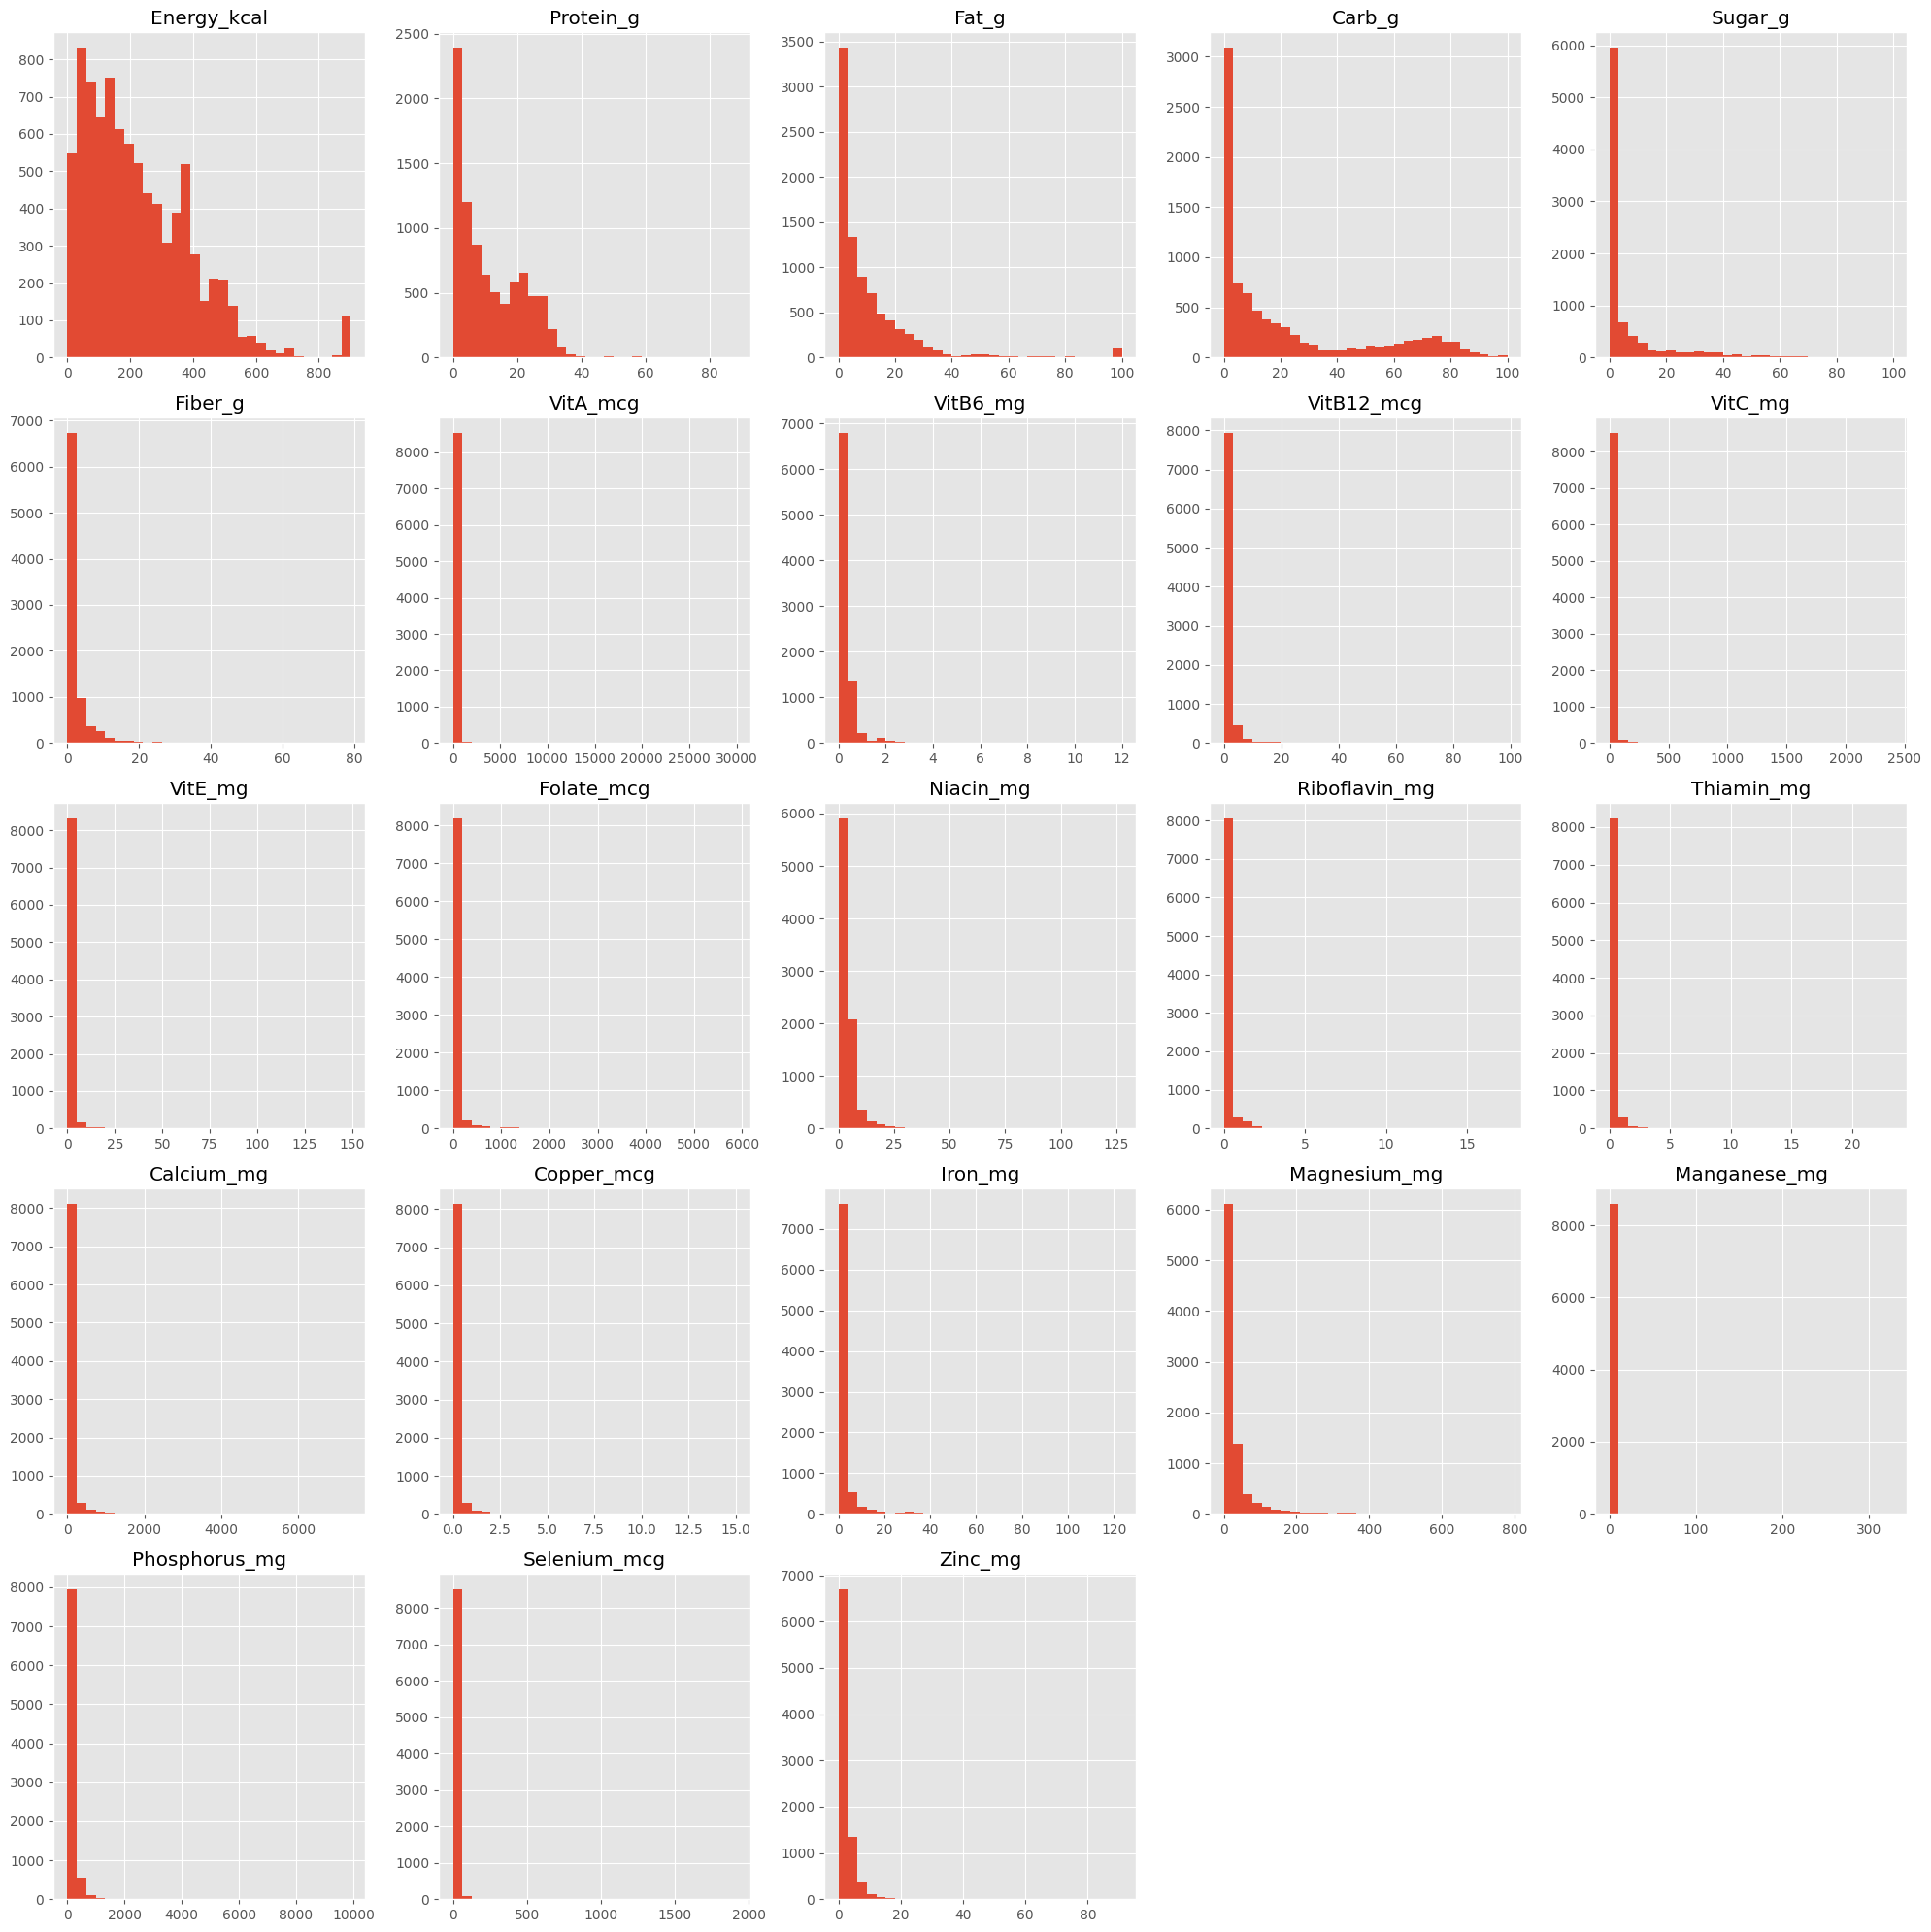

In [78]:
fig = df.hist(bins=30, figsize=(20, 20))
plt.tight_layout()

In [79]:
df_log = np.log1p(df) 

In [80]:
df_log.describe()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
count,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,5.075155,2.073285,1.783379,2.118534,1.018775,0.670117,1.698699,0.197749,0.454007,0.804010,...,0.181921,0.156594,3.153335,0.126583,0.939353,2.809058,0.183168,4.262292,1.698225,0.800092
std,0.974674,1.056886,1.181014,1.610507,1.278396,0.819444,2.044344,0.240045,0.654592,1.266192,...,0.216586,0.222113,1.507092,0.202792,0.712336,1.292329,0.382983,1.718525,1.434322,0.695503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.543295,1.244155,0.689388,0.039221,0.000000,0.000000,0.000000,0.033676,0.000000,0.000000,...,0.044973,0.029559,2.302585,0.029559,0.425268,2.397895,0.000000,3.637586,0.095310,0.207014
50%,5.257495,2.228400,1.830178,2.297070,0.314811,0.262364,0.895880,0.113329,0.076961,0.000000,...,0.139762,0.074643,2.995732,0.076035,0.845868,3.044522,0.021761,4.897840,1.589235,0.612476
75%,5.820083,3.043450,2.701361,3.523415,1.840550,1.223775,3.091042,0.303801,0.831820,1.252763,...,0.231112,0.201307,4.143135,0.135186,1.275363,3.401197,0.200489,5.379897,3.104587,1.308333
max,6.805723,4.492225,4.615121,4.615121,4.613138,4.382027,10.308986,2.564949,4.604070,7.783641,...,2.917771,3.193558,8.904494,2.775709,4.825109,6.661855,5.796058,9.202207,7.559038,4.521245


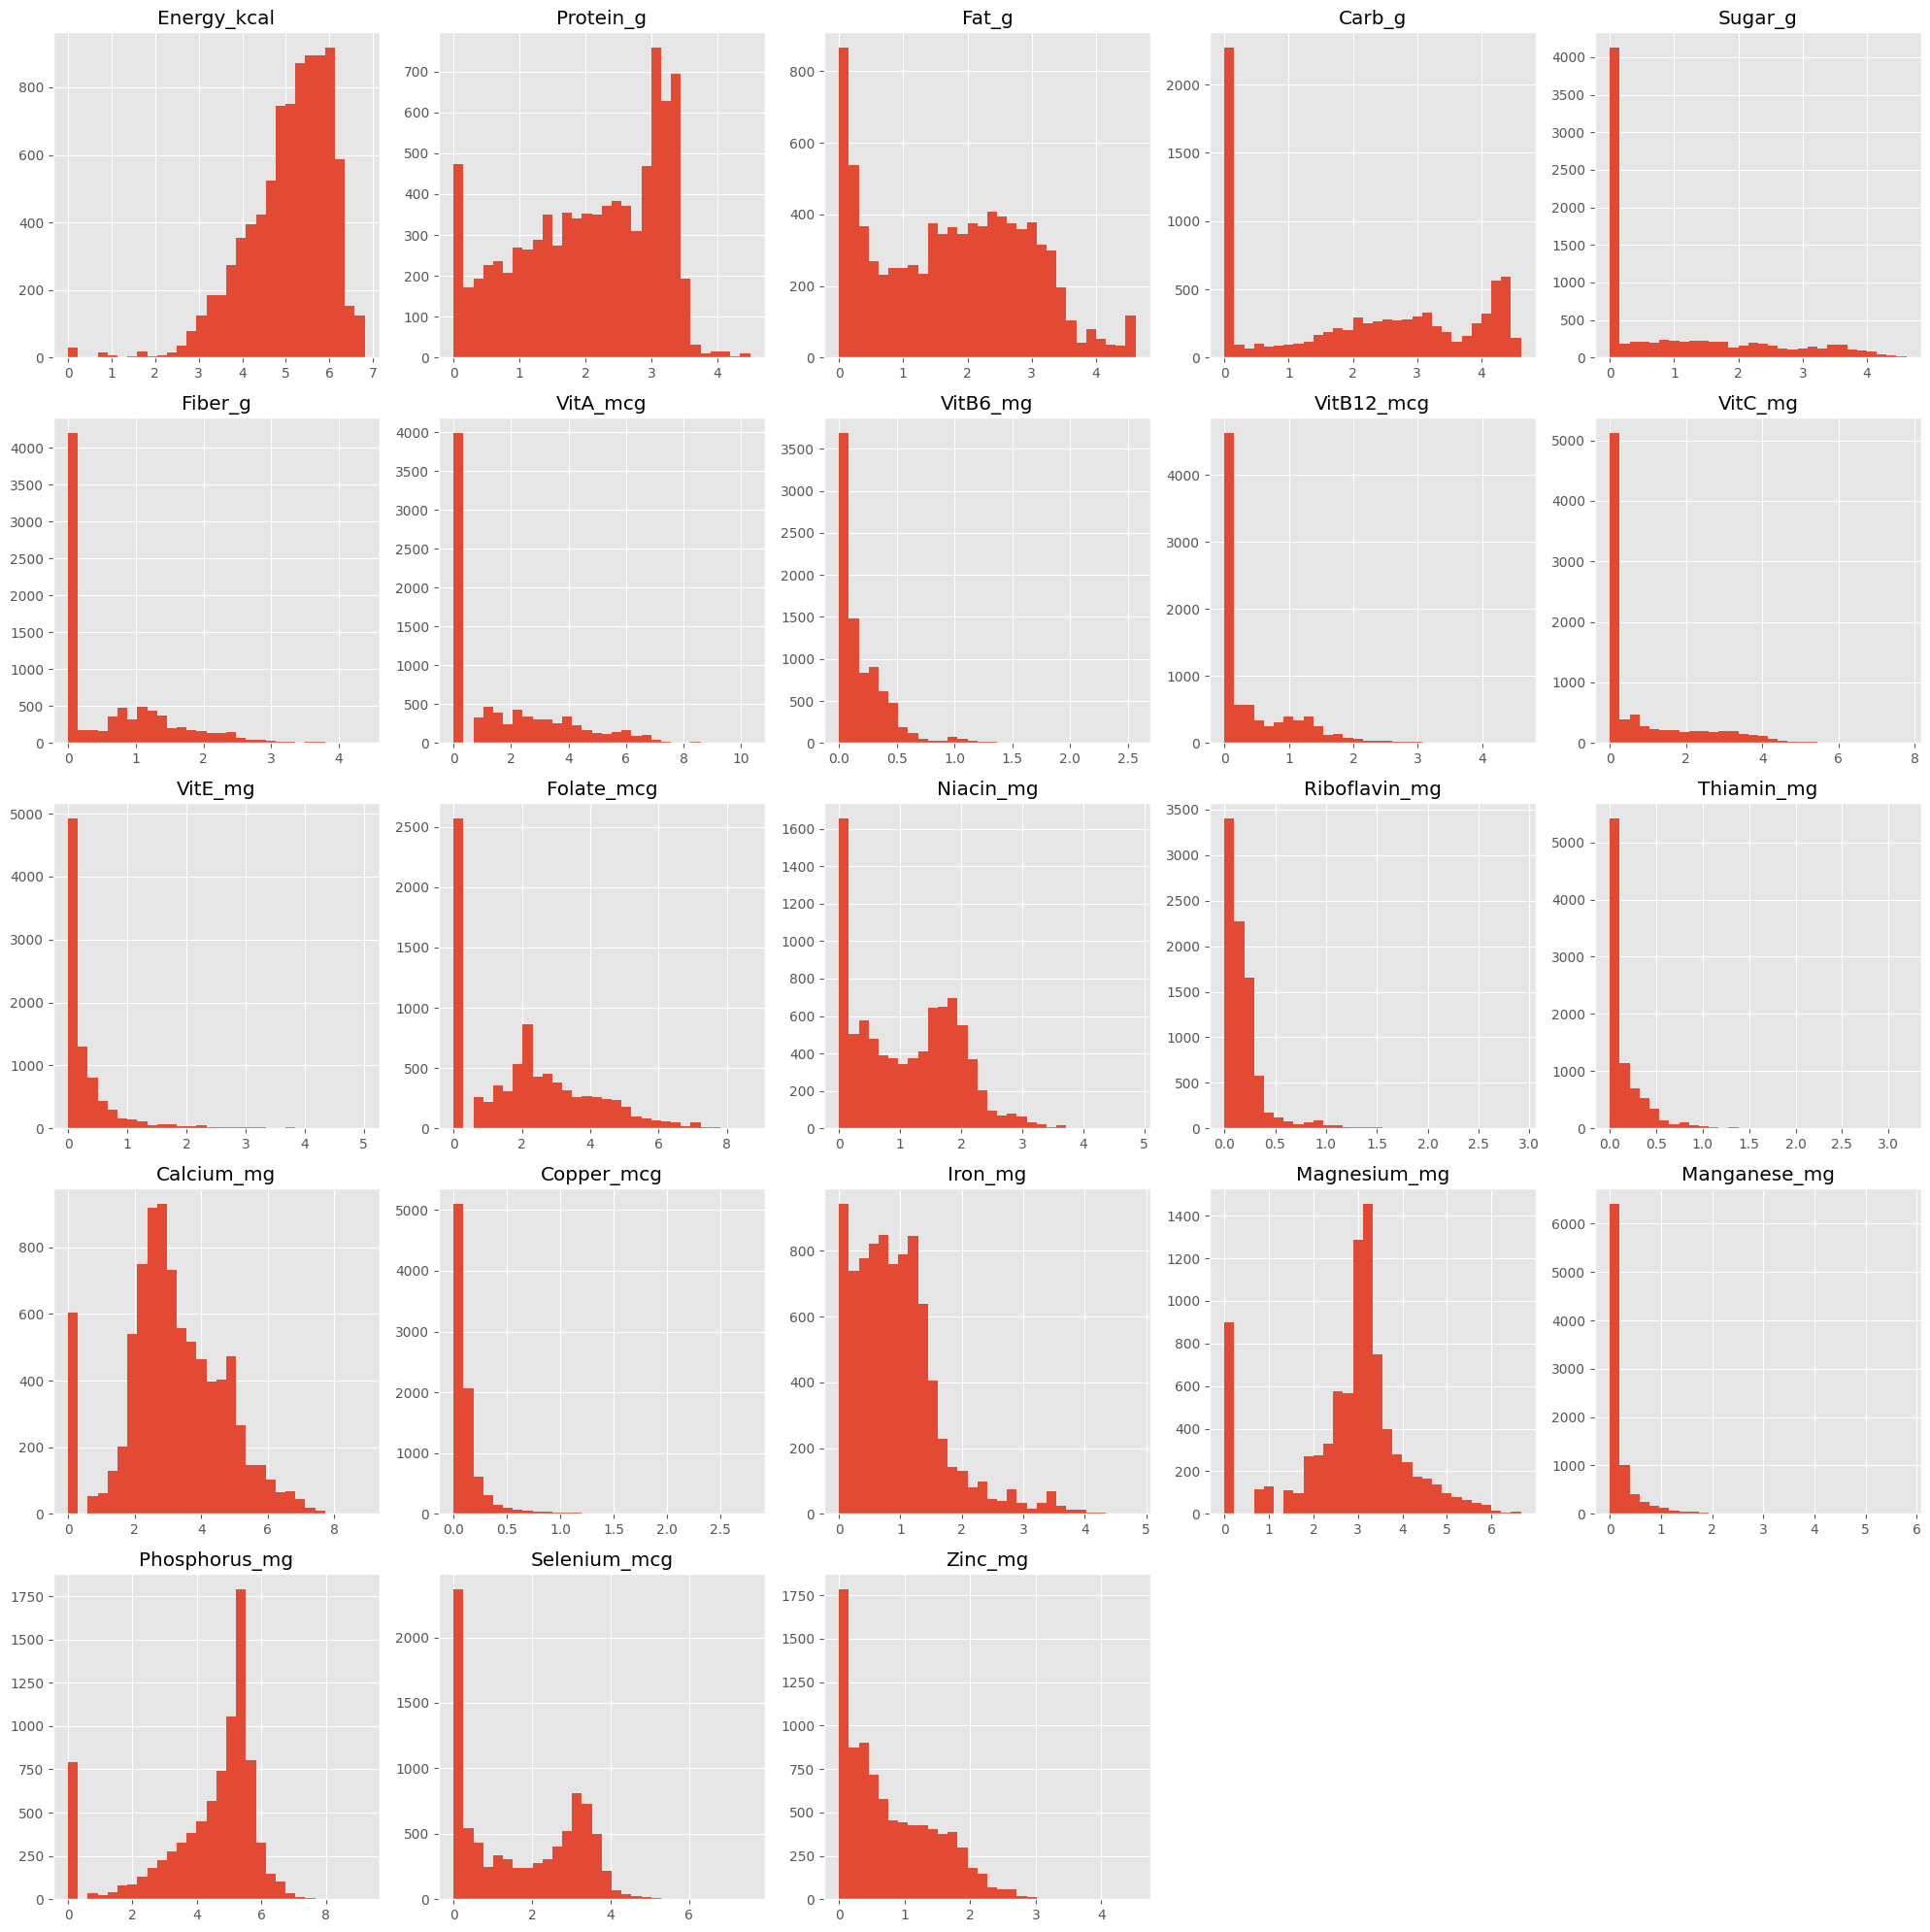

In [82]:
fig = df_log.hist(bins=30, figsize=(20, 20))
plt.tight_layout()

### Ejercicio 6: Estandarizado
Estandariza cada variable. (No es necesario que dividas en train y test por simplificar).

In [83]:
scaler = StandardScaler()
df_log_scal = scaler.fit_transform(df_log)

### Ejercicio 7: Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [88]:
from sklearn.decomposition import PCA # Aquí es donde puedes encontrar la PCA

modelo_pca = PCA()
modelo_pca.fit(df_log_scal)

PCA()

In [89]:
modelo_pca.components_

array([[ 1.98045037e-01,  2.77927414e-01,  1.48023630e-01,
         2.89780903e-03, -2.65499742e-02,  7.44287030e-02,
         7.99931465e-02,  2.63414232e-01,  2.15147624e-01,
        -2.41578310e-02,  8.06581235e-02,  1.95833995e-01,
         3.03454941e-01,  2.66735762e-01,  2.29400104e-01,
         1.54403008e-01,  1.88308882e-01,  2.81809108e-01,
         2.75670564e-01,  1.39020852e-01,  2.95597187e-01,
         2.47376233e-01,  2.98978117e-01],
       [ 5.43376081e-03, -2.42246049e-01, -1.50169742e-01,
         4.39120170e-01,  3.20254528e-01,  3.88059380e-01,
         1.09656229e-01,  7.44157690e-03, -2.36848125e-01,
         2.56138028e-01,  1.24465943e-01,  2.12485525e-01,
        -1.07131816e-01,  7.25659699e-02,  1.60925570e-01,
         2.04121098e-01,  1.36706989e-01,  1.24534002e-01,
         1.12674513e-01,  2.59182219e-01, -6.16379393e-02,
        -2.25185178e-01, -1.59529783e-01],
       [-5.22265271e-01, -7.90226661e-02, -4.73911046e-01,
        -2.10881292e-01, -1.8

### Ejercicio 8

Muestra en un dataframe la relación de cada componente con cada feature. En general, este paso no lo haremos salvo que sea necesario a posteriori explicar la influencia de alguna componente en función de las features originales, pero ahora, muéstralas.

In [ ]:
pd.DataFrame(
    data    = modelo_pca.components_, 
    columns = df_log.columns, # df_log_scal es un array de numpy y no tienen nombre de columnas
    index   = [f'PC{i}' for i in range(1,len(df_log.columns)+1)] # En ingles pasamos de CP a PC :-) (Principal component)
)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
PC1,0.198045,0.277927,0.148024,0.002898,-0.026550,0.074429,0.079993,0.263414,0.215148,-0.024158,...,0.266736,0.229400,0.154403,0.188309,0.281809,0.275671,0.139021,0.295597,0.247376,0.298978
PC2,0.005434,-0.242246,-0.150170,0.439120,0.320255,0.388059,0.109656,0.007442,-0.236848,0.256138,...,0.072566,0.160926,0.204121,0.136707,0.124534,0.112675,0.259182,-0.061638,-0.225185,-0.159530
PC3,-0.522265,-0.079023,-0.473911,-0.210881,-0.184202,-0.136179,0.292311,0.159116,0.185990,0.394600,...,0.096958,-0.057955,0.093723,0.040051,-0.039002,0.073287,-0.029160,0.016400,0.062524,0.039190
PC4,0.064251,-0.132056,0.032874,0.038051,0.281229,-0.081251,0.086504,0.312399,0.232704,0.153351,...,0.352801,0.307120,-0.208702,-0.270591,0.124226,-0.319855,-0.327222,-0.230474,-0.164419,-0.026426
PC5,0.148431,-0.074988,0.335097,-0.094996,0.089666,-0.196324,0.544616,-0.071754,0.078367,0.127914,...,-0.046883,-0.220295,0.212893,0.008586,-0.181673,-0.044502,-0.074241,0.010867,0.095435,-0.052027
PC6,-0.056377,-0.130078,0.031900,-0.195738,-0.232627,0.056819,-0.220996,0.151959,0.055321,0.104925,...,-0.032598,-0.001320,-0.440449,0.404956,0.041904,-0.096259,0.353709,-0.273709,-0.079276,0.095311
PC7,0.056439,0.006583,0.061057,0.057248,0.124189,-0.158187,0.188459,-0.218884,0.294178,-0.082043,...,0.225303,-0.113935,0.111275,0.569171,0.176256,-0.217741,0.099441,-0.148707,-0.125677,0.076144
PC8,0.006633,-0.043613,0.090748,0.000223,-0.484500,-0.066867,0.381964,-0.084649,-0.247129,-0.302244,...,0.196122,0.395320,-0.056744,-0.055444,0.003136,-0.191494,0.196760,-0.103840,0.009711,-0.317642
PC9,-0.056684,0.127038,0.172536,-0.178933,-0.382132,0.168389,-0.041751,0.105078,-0.071421,0.227712,...,-0.029489,0.049271,0.489771,-0.135641,0.204857,-0.019208,0.041856,-0.019741,-0.397578,0.045342
PC10,-0.295080,-0.017928,-0.318727,-0.035122,0.210174,0.101103,0.080107,0.183531,0.065568,-0.639078,...,0.088774,0.001610,0.233598,-0.020123,-0.103469,-0.016090,0.165279,-0.021910,0.085098,0.002007


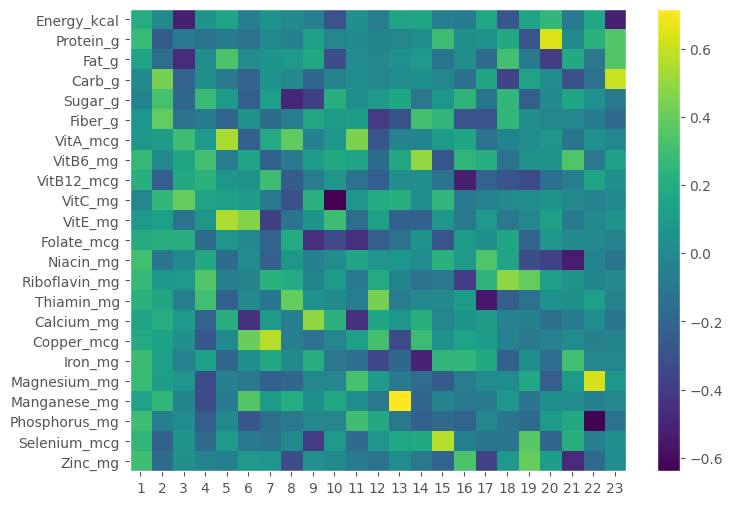

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df_log.columns)), df_log.columns)
plt.xticks(range(len(df_log.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

### Ejercicio 9: Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [98]:
modelo_pca.explained_variance_ratio_

array([0.3125111 , 0.16666503, 0.08532219, 0.07111741, 0.05904531,
       0.04487789, 0.03079514, 0.02718658, 0.02537361, 0.02262291,
       0.02194625, 0.01905314, 0.01852623, 0.01432524, 0.01349698,
       0.01297861, 0.01120283, 0.00974457, 0.00929553, 0.00746957,
       0.00693989, 0.00566242, 0.00384157])

In [99]:
sum(modelo_pca.explained_variance_ratio_)

1.0000000000000002

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.3125111  0.47917612 0.56449832 0.63561572 0.69466103 0.73953892
 0.77033406 0.79752064 0.82289426 0.84551716 0.86746341 0.88651656
 0.90504278 0.91936803 0.93286501 0.94584362 0.95704645 0.96679102
 0.97608654 0.98355611 0.99049601 0.99615843 1.        ]


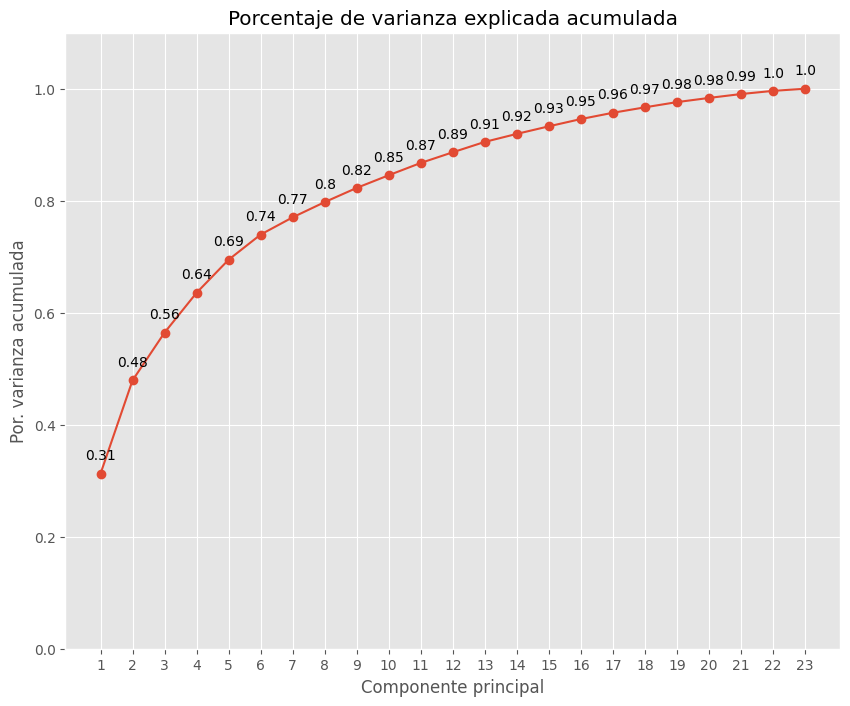

In [103]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
ax.plot(
    np.arange(len(df.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [105]:
#Nos quedamos con 7 componentes principales, ya que explican la varianza que necesitamos
prop_varianza_acum[7]

0.7975206421024936

### Ejercicio 10: Reducción de features

Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [106]:
pca_7 = PCA(n_components=7)
pca_7.fit(df_log_scal)

df_pca = pca_7.transform(df_log_scal)

In [110]:
pca_7.components_.shape

(7, 23)

In [113]:
pd.DataFrame(data = df_pca, columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-2.139032,-0.968019,-1.463985,0.270873,4.066970,0.307264,0.152027
1,-2.106485,-0.909501,-1.480577,0.263241,4.032443,0.348643,0.213318
2,-3.267830,-1.138430,-2.042328,1.175426,4.071690,1.326709,0.443525
3,1.525964,-1.264102,0.136011,-0.929811,2.430393,-2.094985,0.485926
4,1.240712,-1.204120,0.004732,-1.192003,2.691654,-2.341752,0.798052
...,...,...,...,...,...,...,...
8613,2.553661,-2.548700,0.472181,-0.109434,2.716599,0.018398,-0.234114
8614,0.075018,-1.840922,0.935730,-1.348907,-0.392077,-0.759670,-0.426446
8615,-2.930529,1.664406,-1.242050,1.172407,-0.915539,-0.885787,0.985508
8616,1.118895,-0.780834,0.805141,-1.581832,1.641731,1.090066,-0.866455
